### Imports

In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [2]:
# Computational packages
import numpy as np
import matplotlib.pyplot as plt
import torch
import tqdm

# General packages
import datetime
import sys
import os

# custom packages
import ratsimulator
from ratsimulator.Environment import Rectangle
import spatial_maps as sm # CINPLA spatial maps

# avoid adding multiple relave paths to sys.path
sys.path.append("../src") if "../src" not in sys.path else None 
from PlaceCells import PlaceCells
from Models import SorscherRNN
from Experiment import Experiment
from methods import *
from datahandling import *
from Plots import *

### Setup Experiment

In [7]:
experiment = Experiment(name := '3ME')
experiment.setup()

Experiment <3ME> already EXISTS. Loading experiment settings!
Loading experiment details
This experiment has ALREADY been setup - SKIPPING.


False

In [8]:
checkpoint_filenames = filenames(experiment.paths['checkpoints'])
# load model latest (wrt. #epochs trained)
print(f"Loading model at epoch = {checkpoint_filenames[-1]}")
checkpoint = torch.load(experiment.paths['checkpoints'] / checkpoint_filenames[-1])
loss_history = checkpoint['loss_history']
training_metrics = checkpoint['training_metrics']

Loading model at epoch = 2999


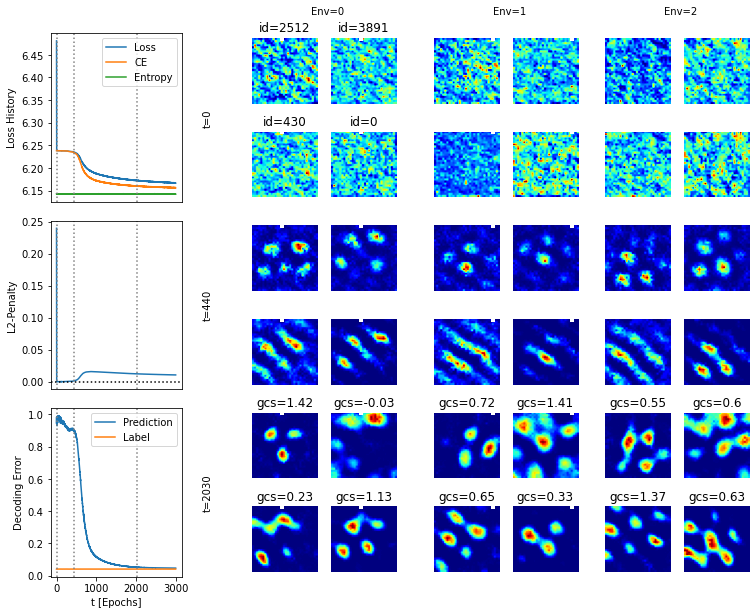

In [9]:
figname = "training_dynamics_" + name
fig = eval(figname)(experiment, loss_history, training_metrics, ps=[0.9999, 0.95, 0.05])

In [6]:
fig.savefig(experiment.paths['experiment'] / (figname + ".pdf"))